In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
dataset = pd.read_csv('Data/Real-Data/Real_Combine.csv')

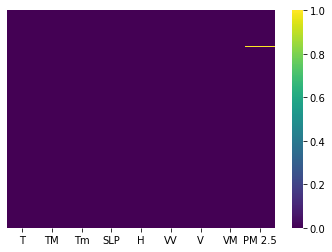

In [17]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=True, cmap='viridis' )

In [18]:
dataset = dataset.dropna()
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

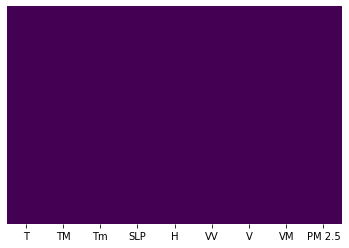

In [19]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False,cmap='viridis')

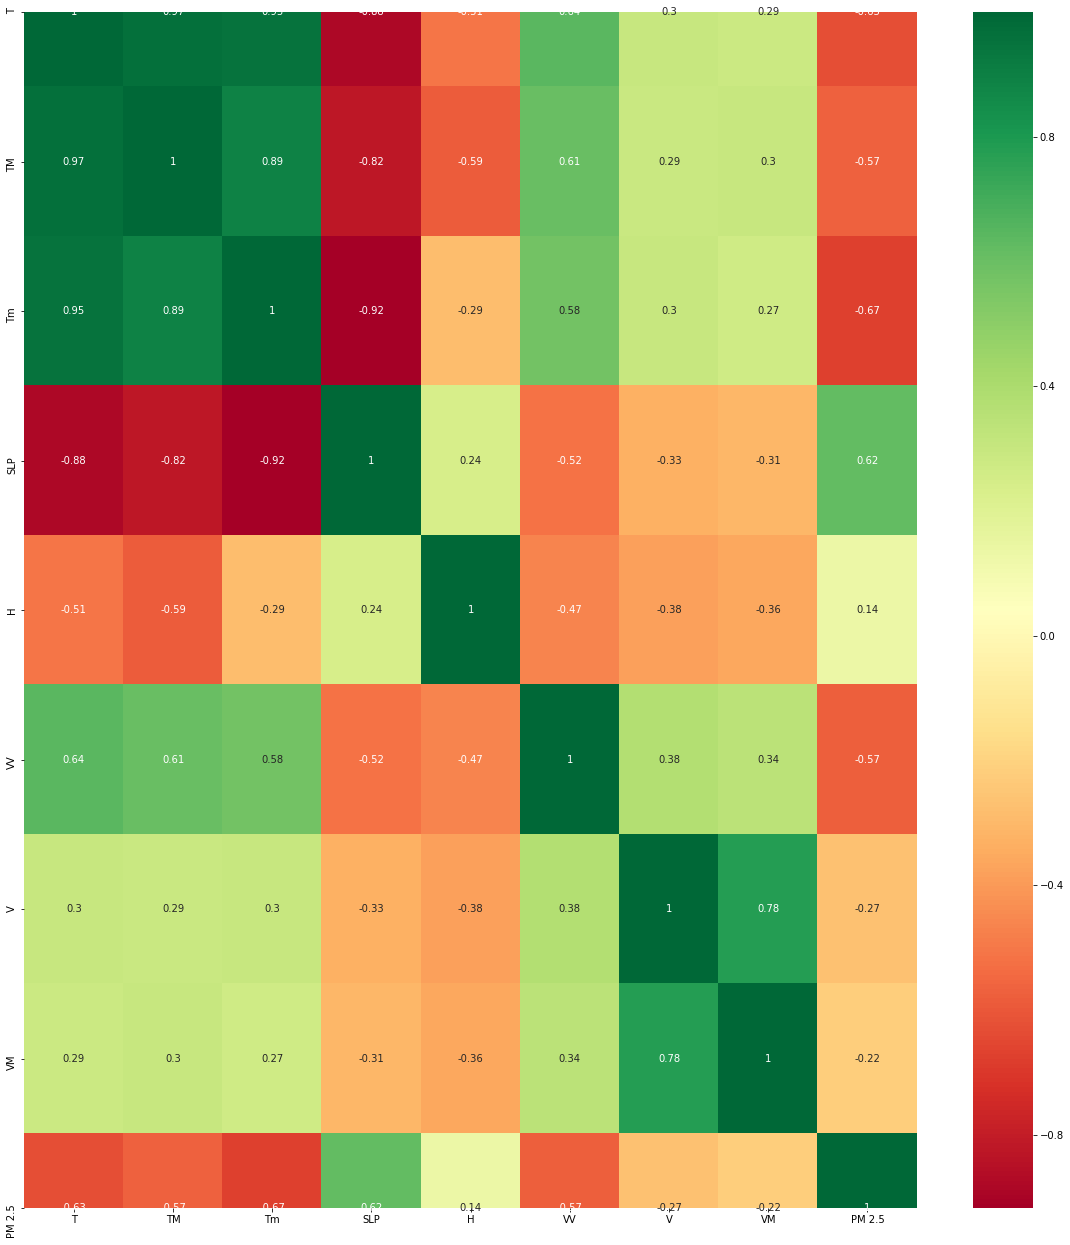

In [20]:
top_feature = dataset.corr()
plt.figure(figsize=[20,22])
sns.heatmap(dataset[top_feature.index].corr(), annot=True, cmap = "RdYlGn")

In [21]:
from sklearn.feature_selection import SelectKBest, chi2

In [26]:
kbest = SelectKBest(score_func=chi2, k=5)
y_fit=kbest.fit(X,y)

ValueError: Unknown label type: (array([219.72083333, 182.1875    , 154.0375    , ..., 169.        ,
       186.04166667, 185.58333333]),)

In [27]:
np.isnan(X)

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1088,False,False,False,False,False,False,False,False
1089,False,False,False,False,False,False,False,False
1090,False,False,False,False,False,False,False,False
1091,False,False,False,False,False,False,False,False


In [28]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.14140586 0.15756524 0.2121401  0.13452641 0.09236893 0.1616061
 0.05743256 0.04295481]


/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [92]:
np.any(np.isnan(dataset))

False

In [93]:
np.all(np.isfinite(dataset))

True

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [35]:
model = LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_train, y_train))

0.5421299931252602


In [36]:
model.coef_

array([-1.85977705e+00,  4.99320331e-01, -4.53670365e+00,  1.93233542e-02,
       -1.13663763e+00, -3.97412217e+01, -2.67904145e+00,  6.00143728e-01])

In [37]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X,y).mean())

0.46830071902895504


/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [38]:
model.score(X_test, y_test)

0.4925269550224086

In [39]:
import pickle

In [40]:
file = open('Data/LinearRegressionModelPickle','wb')
pickle.dump(model, file)